In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
# Carpeta con imágenes procesadas
ruta_procesadas = './images/procesadas/'

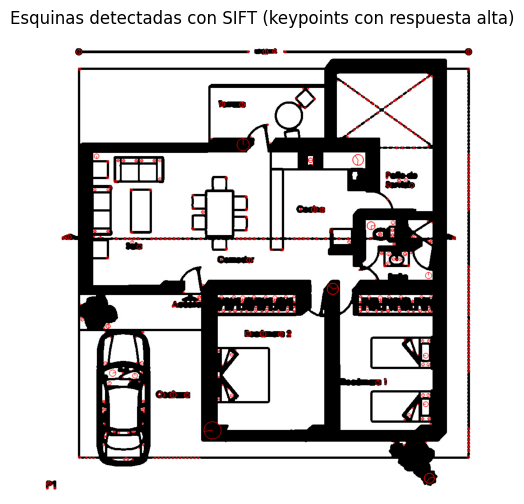

Cantidad de esquinas detectadas (con respuesta > 0.118): 707


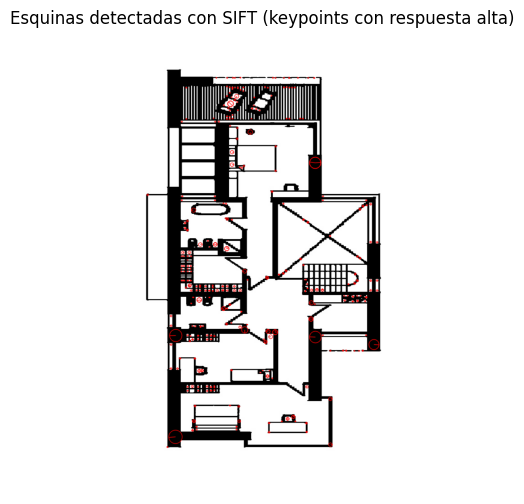

Cantidad de esquinas detectadas (con respuesta > 0.118): 442


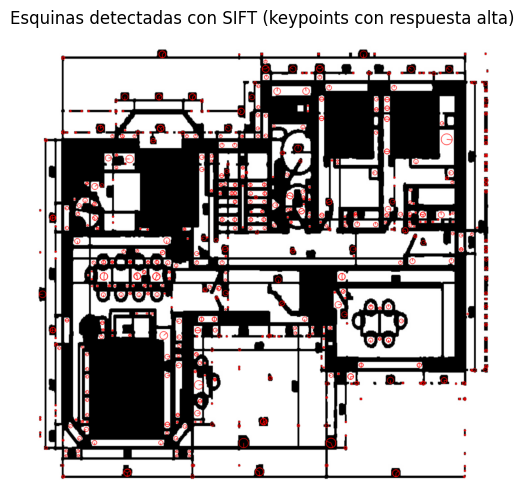

Cantidad de esquinas detectadas (con respuesta > 0.118): 835


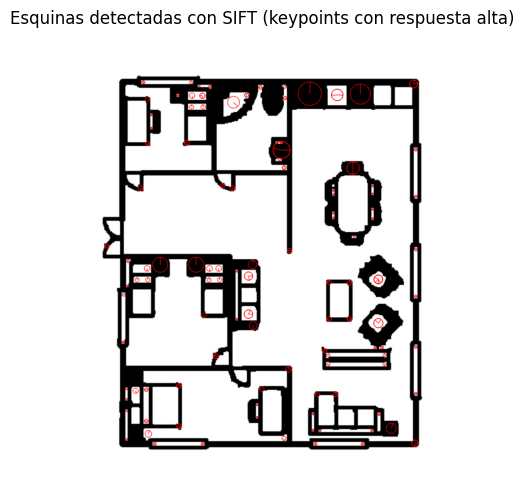

Cantidad de esquinas detectadas (con respuesta > 0.118): 186


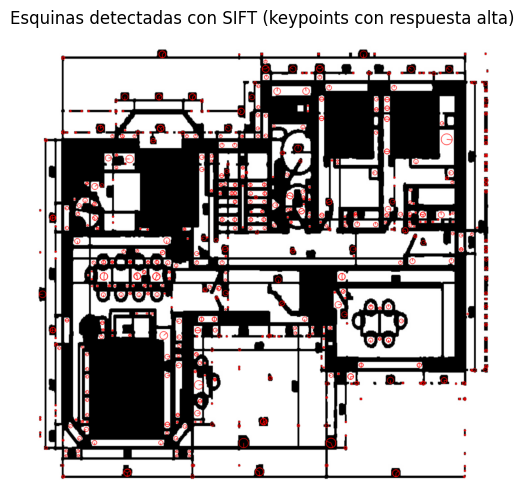

Cantidad de esquinas detectadas (con respuesta > 0.118): 835


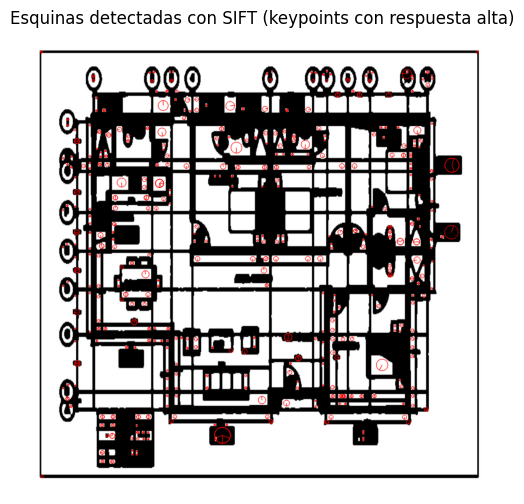

Cantidad de esquinas detectadas (con respuesta > 0.118): 660


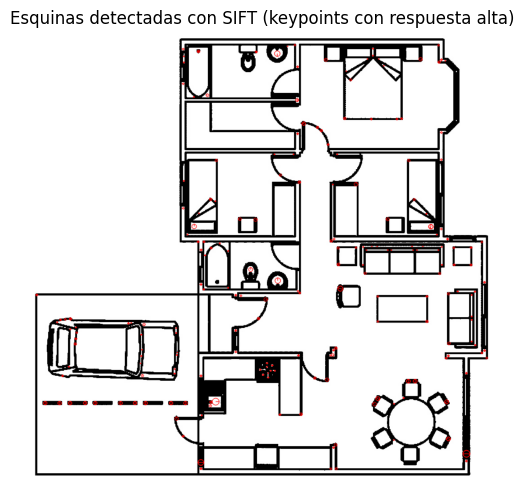

Cantidad de esquinas detectadas (con respuesta > 0.118): 349


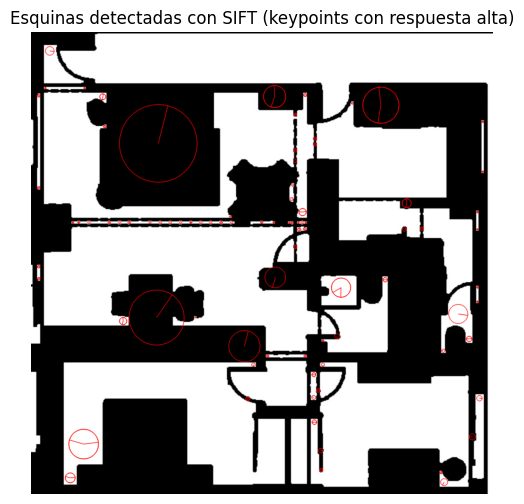

Cantidad de esquinas detectadas (con respuesta > 0.118): 140


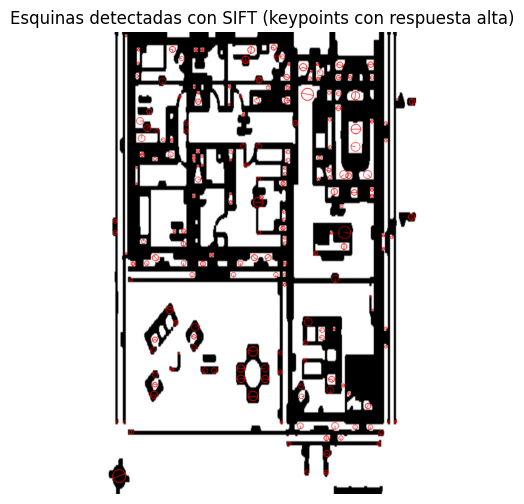

Cantidad de esquinas detectadas (con respuesta > 0.118): 321


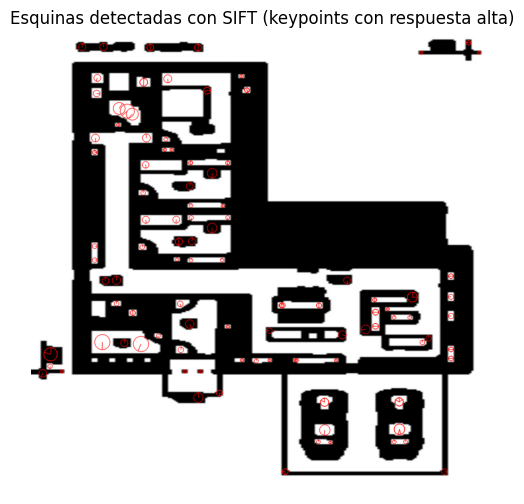

Cantidad de esquinas detectadas (con respuesta > 0.118): 147


In [5]:
for nombre in sorted(os.listdir(ruta_procesadas)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializa el detector SIFT
    sift = cv2.SIFT_create()

    # Detecta puntos clave y calcula descriptores
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Filtra puntos clave que tienen alta respuesta (probablemente son esquinas fuertes)
    threshold_response = 0.118  # Puedes ajustar este valor
    corner_keypoints = [kp for kp in keypoints if kp.response > threshold_response]

    # Dibuja SOLO los puntos clave considerados esquinas
    image_with_corners = cv2.drawKeypoints(image, corner_keypoints, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Muestra la imagen con las esquinas detectadas
    plt.figure(figsize=(8,6))
    plt.imshow(image_with_corners)
    plt.title("Esquinas detectadas con SIFT (keypoints con respuesta alta)")
    plt.axis('off')
    plt.show()

    print(f"Cantidad de esquinas detectadas (con respuesta > {threshold_response}): {len(corner_keypoints)}")